In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Read the Dataset
# path = "/content/drive/MyDrive/Colab Notebooks/Lending Club Data/Loan_status_2007-2020Q3.gzip"
df = pd.read_csv(r'C:\Users\mehed\Google Drive\Colab Notebooks\Lending Club Data\Loan_status_2007-2020Q3.gzip')

In [4]:
#Check the Dataset 
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [5]:
#Check the shape of Dataset.
df.shape

(2925493, 142)

In [6]:
#Checking the Loan Status. Loan Status is the target class for analysis.
df.loan_status.value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

In [7]:
#Out of several Loan Status this analysis consider only Fully Paid, Charged of and Default status. 
df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off','Default']))]

In [8]:
#Define the Loan status to Paid and Default.
df.loan_status = df.loan_status.map(lambda x: "Paid" if x == 'Fully Paid' else "Default")

In [9]:
# Look for the shape of selected dataset.
df.shape

(1860764, 142)

Number of Loan issued 
 2007       251
2008      1562
2009      4716
2010     11536
2011     21721
2012     53367
2013    134814
2014    235619
2015    402837
2016    403104
2017    314368
2018    197178
2019     75405
2020      4286
Name: Date, dtype: int64


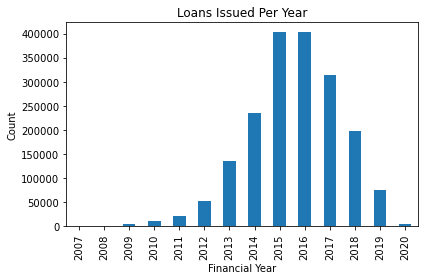

In [10]:
#Number of loan issued throughout the years 

df['Date'] = pd.to_datetime(df.issue_d)

df['Date'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

print("Number of Loan issued \n",df['Date'].dt.year.value_counts().sort_index())

plt.show()

# Feature Selection and Data Preproccessing



**Now finding missing values and their data types**

In [11]:
#Merging the two table into one to get the insights of number of missing value of each features and their data type. 
df_data_types = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [12]:
#Check the mergerd table 
df_data_types.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
0,Unnamed: 0,0,int64
1,open_acc,0,float64
2,pub_rec,0,float64
3,revol_bal,0,float64
4,total_acc,0,float64
...,...,...,...
135,hardship_end_date,1848057,object
136,payment_plan_start_date,1848057,object
140,hardship_type,1848057,object
141,hardship_loan_status,1848068,object


**Checking and dropping columns having more than 50% missing values.**

In [13]:
#Dropping the 50% missing valued columns from the dataset.
missing_columns = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()
missig_Values = list(missing_columns[missing_columns.missing_value >= 900000]['index'])
df.drop(missig_Values, axis = 1, inplace = True)

In [14]:
#Looking for data shape after removing null and more than 50% missing valued features.
df.shape

(1860764, 107)

II)Dropping constant features

In [15]:
#Dropping unique valued features
def get_unique(dataFrame):
    unique_features = []
    for i in list(dataFrame.columns):
        if dataFrame[i].unique().size < 2:
            unique_features.append(i)
    return unique_features

unique_features = get_unique(df)
df.drop(unique_features, axis = 1, inplace = True)

**Removing Duplicate Rows from the dataframe**

In [16]:
#Removing duplicate rows from the dataset.
df.drop_duplicates(inplace= True)
df.shape

(1860764, 105)

IV) Removing Duplicate Columns from the Dataframe

In [17]:
#Dropping duplicate Columns from the Dataframe
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

duplicate_cols = duplicate_columns(df)

print(duplicate_cols)

print(df.shape)

[]
(1860764, 105)


**We will go through each feature and decide which features should be deleted from the dataset.**


In [18]:
#Define a empty list where all the removable features would addaed. 
removeable_features = []

In [19]:
#define a function to visualize the features with and without loan status.
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without fetching on the loan status
    - column_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
        ax1.set_ylabel('Count')
        ax1.set_title(col_name)
        plt.xticks(rotation = 90)
        ax1.set_xlabel(col_name)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
        ax2.set_xlabel(col_name)
    
    plt.tight_layout()


**Features 0-20**

In [20]:
#Looking for the first 20 features.
df.iloc[0:5, 0: 20]

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Default,https://lendingclub.com/browse/loanDetail.acti...,car,bike
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Paid,https://lendingclub.com/browse/loanDetail.acti...,other,Personal


Number of Different Loan amount issued:  1568


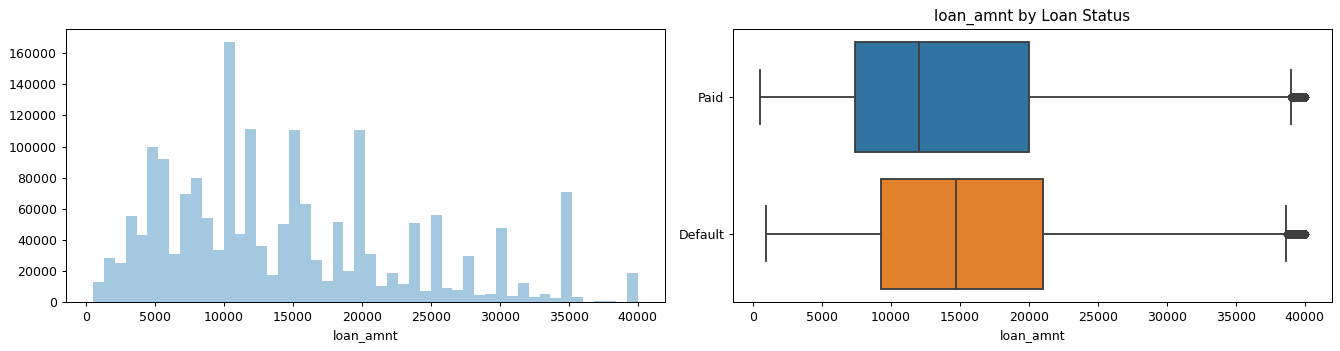

In [21]:
#Plot Loan amount with number of unique value.
print('Number of Different Loan amount issued: ',len(df.loan_amnt.value_counts()))
plot_feature('loan_amnt', True)

Number of Loan issued each Term
 36    1393606
60     467158
Name: term, dtype: int64


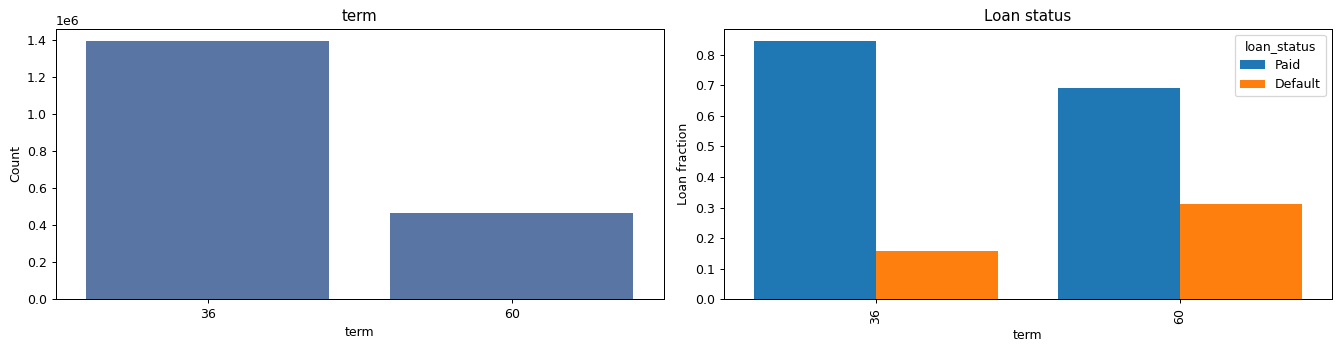

In [22]:
#Plot the Term features.
df.term = df.term.astype(str).str.replace('months', '').astype(np.int)
print("Number of Loan issued each Term\n", df.term.value_counts())
plot_feature('term', False)

Number of different interest rates :  684


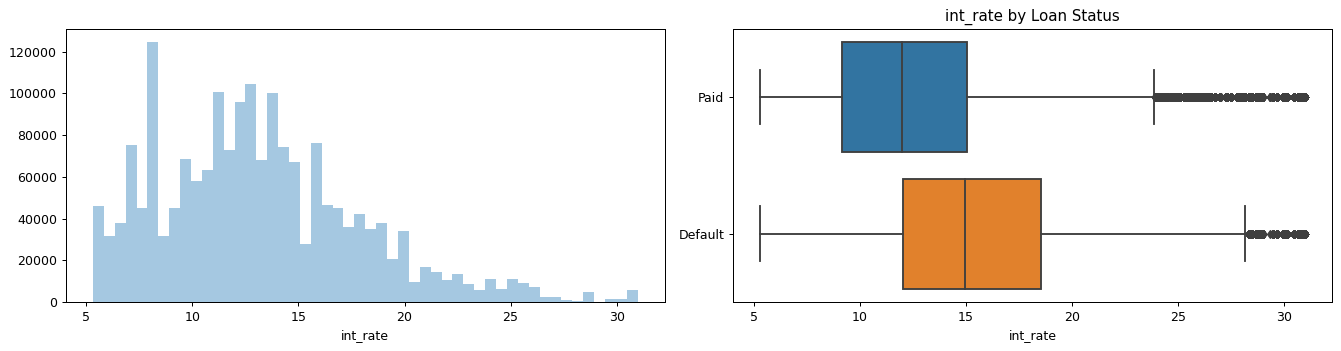

In [23]:
#Plot int_rate feature.
df.int_rate = df.int_rate.astype(str).str.replace('%', '').astype(np.float32)
print("Number of different interest rates : ", len(df.int_rate.value_counts()))
plot_feature('int_rate', True)

Different grades of Loan Borrower
 A    346349
B    546721
C    528265
D    275088
E    116531
F     37115
G     10695
Name: grade, dtype: int64


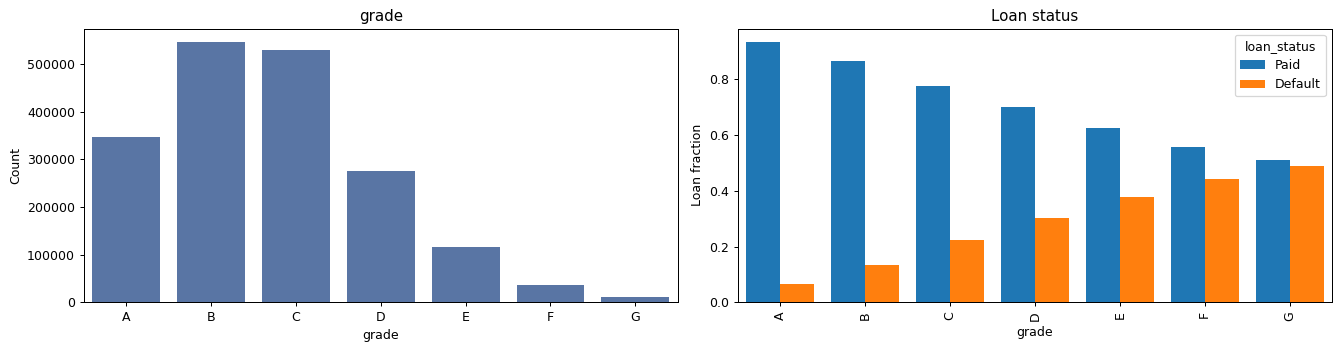

In [24]:
#Plot Grade columns with value counts.
print("Different grades of Loan Borrower\n",df.grade.value_counts().sort_index())
plot_feature('grade', False)

Different Sub grades of Loan Borrower
 A1     67301
A2     55322
A3     57428
A4     77098
A5     89200
B1    102110
B2    102227
B3    109932
B4    115840
B5    116612
C1    118968
C2    108132
C3    103591
C4    102762
C5     94812
D1     69198
D2     63938
D3     54089
D4     47586
D5     40277
E1     29404
E2     26142
E3     22846
E4     19435
E5     18704
F1     11751
F2      8286
F3      6960
F4      5521
F5      4597
G1      3578
G2      2437
G3      1851
G4      1490
G5      1339
Name: sub_grade, dtype: int64


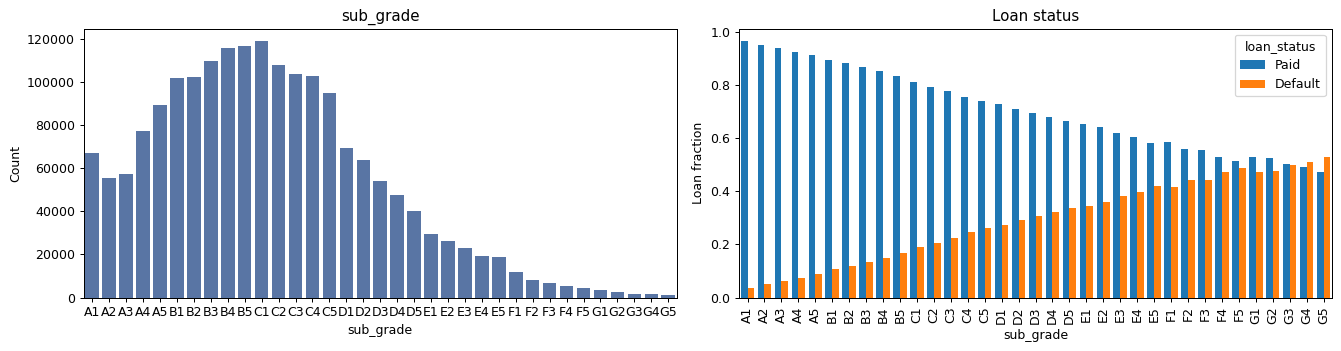

In [25]:
#Plot Sub-grade column.
print("Different Sub grades of Loan Borrower\n",df.sub_grade.value_counts().sort_index())
plot_feature('sub_grade', False)

It seems Subgrades provide more information than grade. We will remove grade and keep the subgrade.

In [26]:
#Check The emploment title.
print("Unique Number of Employment Title: \n",len(df.emp_title.value_counts()))

Unique Number of Employment Title: 
 456736


In [27]:
#Check the emp_length
print ("Different Employment Length:\n", df.emp_length.value_counts().sort_index())

Different Employment Length:
 1 year       122964
10+ years    611462
2 years      168545
3 years      149311
4 years      112236
5 years      115894
6 years       85369
7 years       78153
8 years       78659
9 years       67179
< 1 year     153732
Name: emp_length, dtype: int64


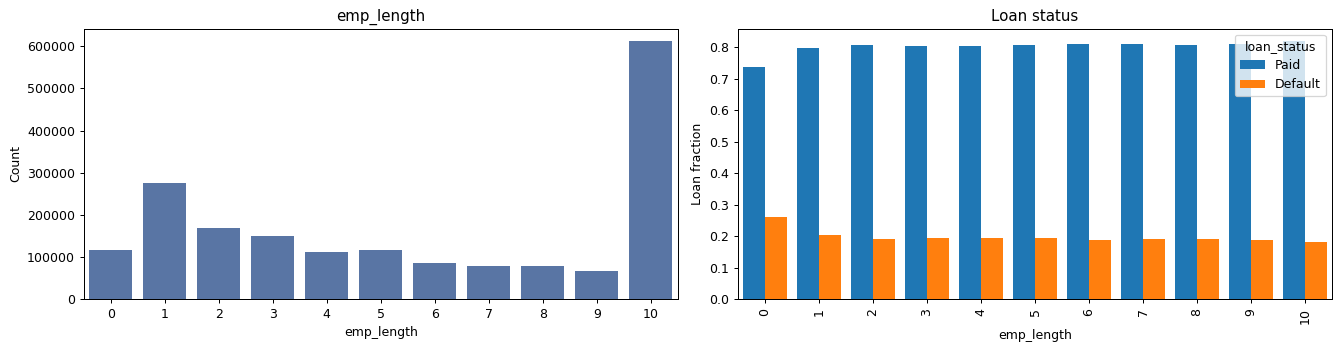

In [28]:
#Modify the emp_length into int.
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
plot_feature('emp_length', False)

Different Homeownership 
 MORTGAGE    918219
RENT        735538
OWN         205639
ANY           1175
OTHER          144
NONE            49
Name: home_ownership, dtype: int64


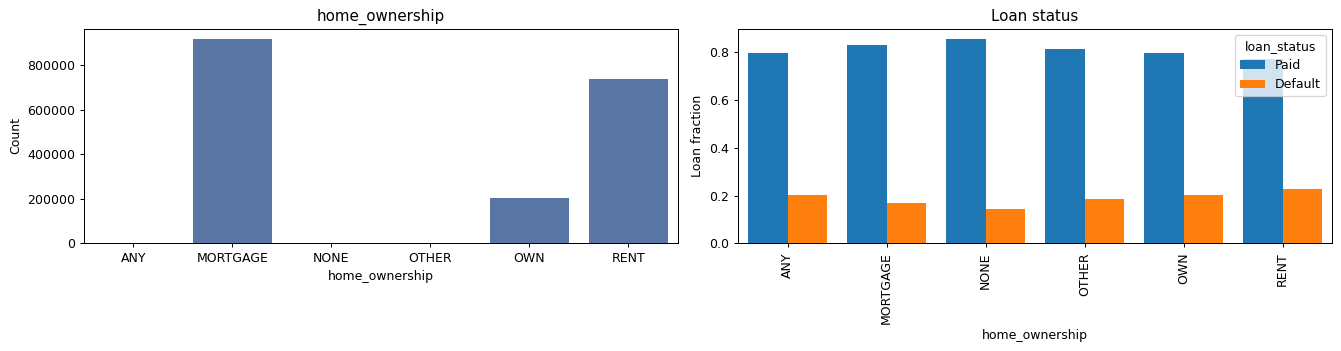

In [29]:
#Check the Home-ownership columns
print("Different Homeownership \n", df.home_ownership.value_counts())
plot_feature('home_ownership', False)

In [30]:
#Check the verification status.
df.verification_status.value_counts()

Source Verified    734249
Not Verified       588491
Verified           538024
Name: verification_status, dtype: int64

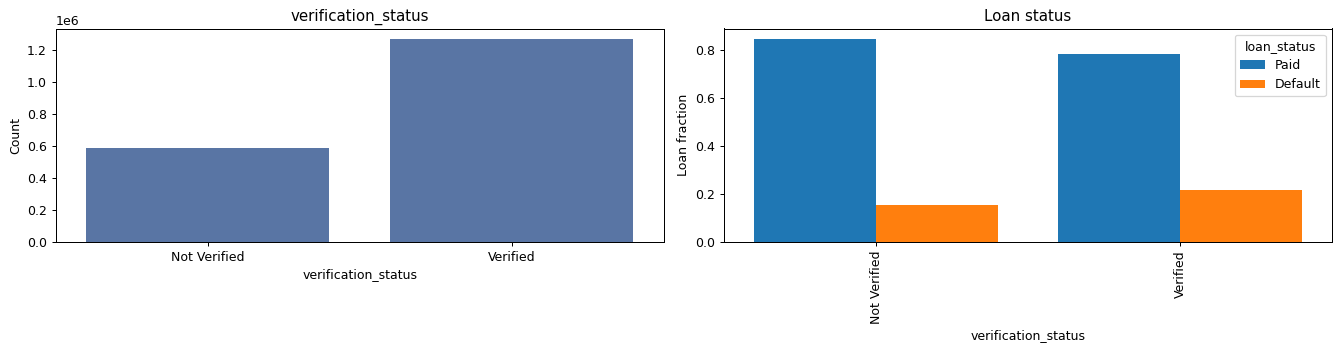

In [31]:
#Modify the verification status into Verified and Not Verified.
df.verification_status = df.verification_status.map(lambda x: "Not Verified" if x == 'Not Verified' else "Verified")
plot_feature('verification_status', False)

Apr    158680
Aug    157693
Dec    145111
Feb    138731
Jan    153662
Jul    174703
Jun    142361
Mar    173330
May    152160
Nov    156028
Oct    180001
Sep    128304
Name: issue_month, dtype: int64


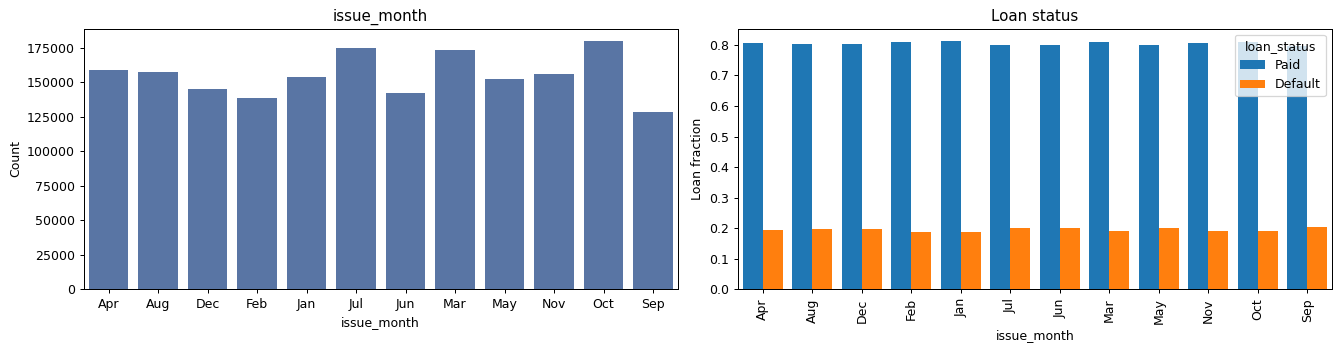

In [32]:
#create a new column from issue_d column and plot it for visualization. 
df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')
print(df.issue_month.value_counts().sort_index())
plot_feature('issue_month', False)

It seems monthwise default rate is flat. 

Apr    158680
Aug    157693
Dec    145111
Feb    138731
Jan    153662
Jul    174703
Jun    142361
Mar    173330
May    152160
Nov    156028
Oct    180001
Sep    128304
Name: issue_month, dtype: int64


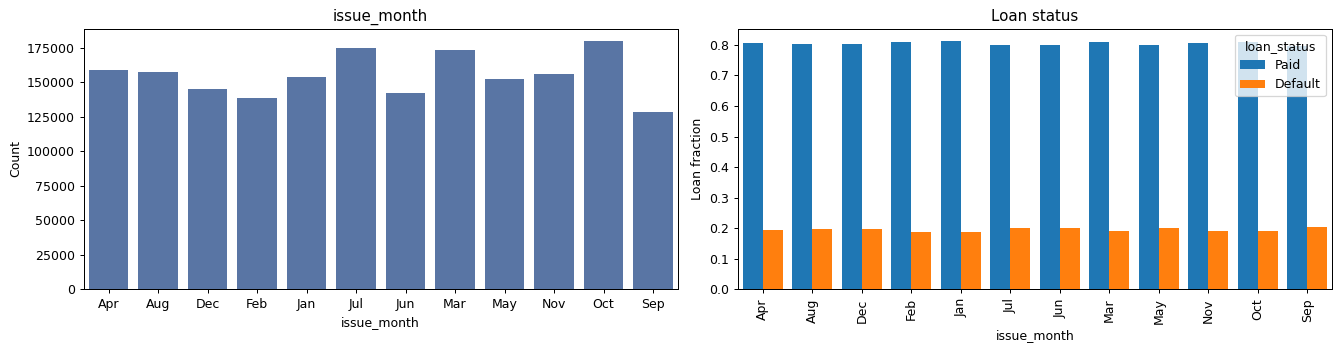

In [33]:
print(df.issue_month.value_counts().sort_index())
plot_feature('issue_month', False)

In [34]:
#Create a column named issue_year.
df['issue_year'] = pd.Series(df.issue_d).str.replace(r'\w+-', '').astype(np.int)

Loan Status:
 Paid       1497783
Default     362981
Name: loan_status, dtype: int64


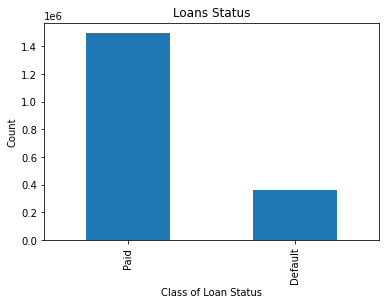

In [35]:
#Check the Loan Status
print("Loan Status:\n",df.loan_status.value_counts())

df.loan_status.value_counts().plot.bar()
plt.title('Loans Status')
plt.xlabel('Class of Loan Status')
plt.ylabel('Count')
plt.show()

Diffrent Purposes of Loan 
 debt_consolidation    1063714
credit_card            412927
home_improvement       123888
other                  113619
major_purchase          41760
medical                 22584
small_business          20519
car                     20219
vacation                13336
moving                  13204
house                   11108
wedding                  2298
renewable_energy         1261
educational               327
Name: purpose, dtype: int64


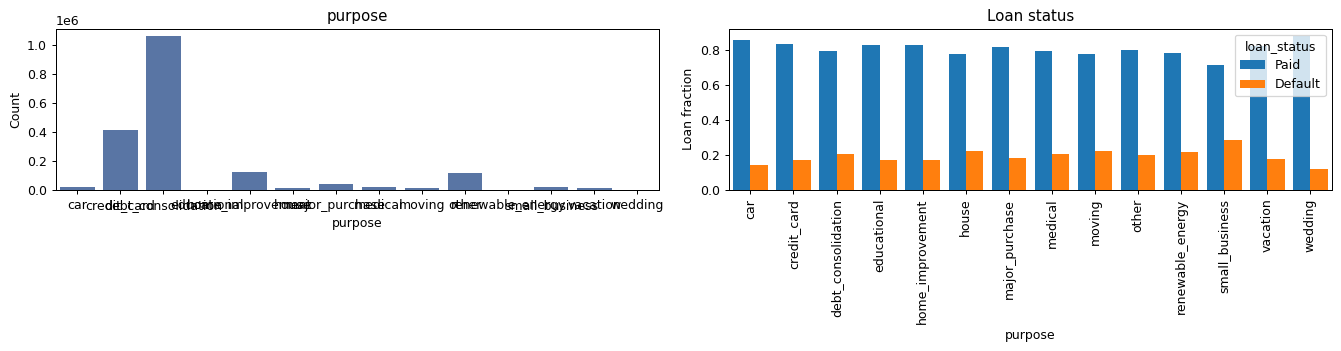

In [36]:
#plot the Purposes
print("Diffrent Purposes of Loan","\n",df.purpose.value_counts())
plot_feature('purpose', False)

From the above visualization it seems that, small business has highest probabilty of getting default.

In [37]:
#check the title columns.
len(df.title.value_counts())

61685

In [38]:
#Add the removeable features.
removeable_features.extend(['Unnamed: 0','emp_title', 'id','url','title'])

**21 - 40 features**

In [39]:
#Check the features from 20th number of column to 40th number of column
df.iloc[0:5, 20: 40]

,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16
1,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17
2,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67
3,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92
4,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91


In [40]:
#Check the Zipcode
len(df.zip_code.value_counts())

949

Number of loan issued in different States
 CA    264525
TX    152990
NY    150911
FL    133643
IL     72623
NJ     66982
PA     62774
OH     61150
GA     60592
NC     52062
VA     51929
MI     48661
AZ     45521
MD     43593
MA     42719
CO     40501
WA     39944
MN     32966
IN     30728
MO     29725
TN     29092
CT     28161
NV     27866
WI     24834
AL     22802
OR     22555
SC     22489
LA     21072
KY     17917
OK     16964
KS     15489
AR     14087
UT     13463
NM     10028
MS      9932
HI      9050
NH      9049
RI      8191
WV      6551
NE      6009
DE      5264
MT      5257
DC      4549
AK      4343
WY      3984
VT      3877
SD      3773
ME      3583
ID      3313
ND      2674
IA         7
Name: addr_state, dtype: int64


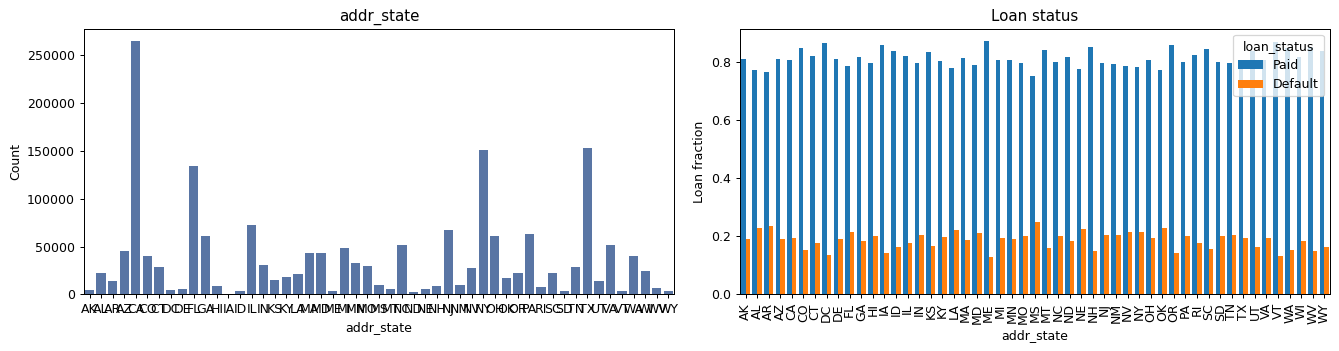

In [41]:
#Plot the state-wise loan distribution.
print('Number of loan issued in different States\n',df.addr_state.value_counts())
plot_feature('addr_state', False)

In [42]:
#Modify the earliest_cr_line features.
df['earliest_cr_year'] = df.earliest_cr_line.str.replace(r'\w+-', '').astype(np.int)

In [43]:
#Modify the revol_util
df.revol_util = df.revol_util.astype(str).str.replace('%', '').astype(np.float32)

In [44]:
#Check the initial List feature
print("Number of Initial List:\n",df.initial_list_status.value_counts())

Number of Initial List:
 w    1195246
f     665518
Name: initial_list_status, dtype: int64


In [45]:
#Adding some removeable features.
removeable_features.extend(['zip_code', 'inq_last_6mths', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'])

In [46]:
#Check the features from 40th number of column to 60th number of column
df.iloc[0:5, 41: 60]

,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m
0,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.00,Jan-2017,67.30,Apr-2018,684.0,680.0,0.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


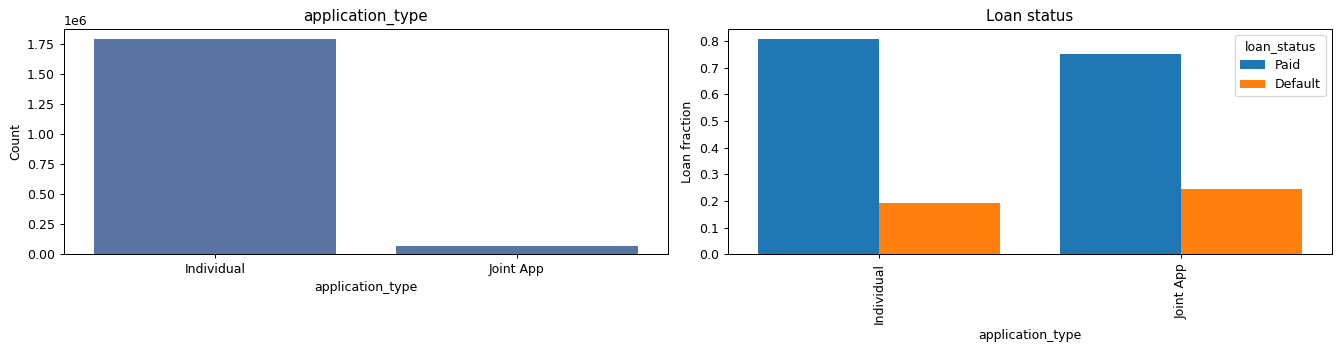

In [47]:
#Plot the application type column.
df.application_type.value_counts()
plot_feature('application_type',False)

In [48]:
#add some unnecessary features to the remove_features list.
removeable_features.extend(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal'])

In [49]:
#Check the features from 61th number of column to 80th number of column
df.iloc[0:5, 61: 80]

,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#Check the features afetr 80th column
df.iloc[0:5, 81:]

,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Date,issue_month,issue_year,earliest_cr_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,2011-12-01,Dec,2011,1985
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,2011-12-01,Dec,2011,1999
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,2011-12-01,Dec,2011,2001
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,2011-12-01,Dec,2011,1996
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,2011-12-01,Dec,2011,1996


0.0     1629217
1.0      218397
2.0        9725
3.0        1953
4.0         505
5.0         177
6.0          58
7.0          21
8.0           9
9.0           3
12.0          1
11.0          1
Name: pub_rec_bankruptcies, dtype: int64


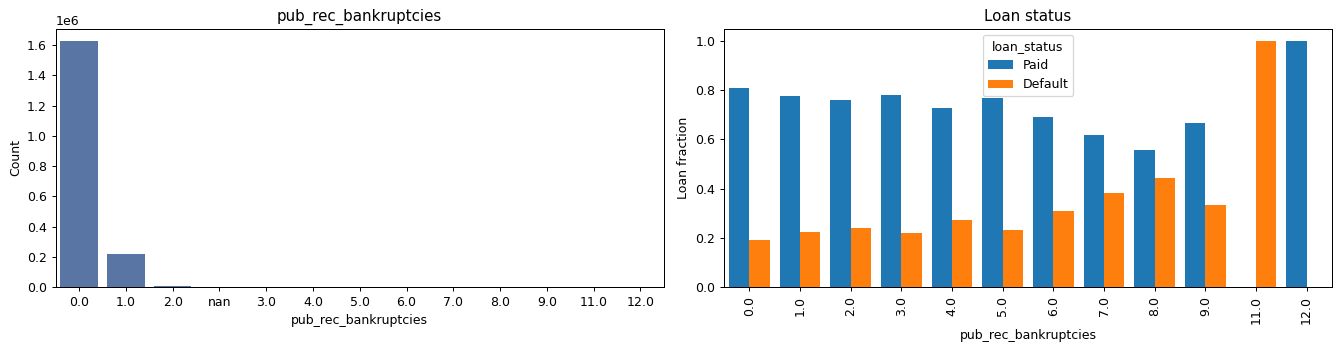

In [51]:
#Checking the pub_rec_bankruptcies column.
print(df.pub_rec_bankruptcies.value_counts())
plot_feature("pub_rec_bankruptcies", False)

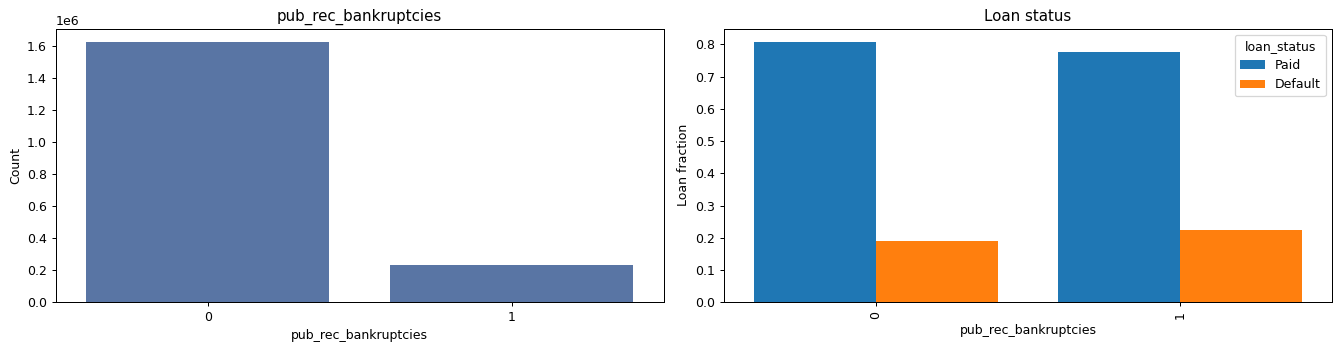

In [52]:
#modify the pub_rec_bankruptcies ito binary and plot it.
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0, 1, 0)
plot_feature("pub_rec_bankruptcies", False)

Number of Debt Settlement:
 N    1809589
Y      51175
Name: debt_settlement_flag, dtype: int64


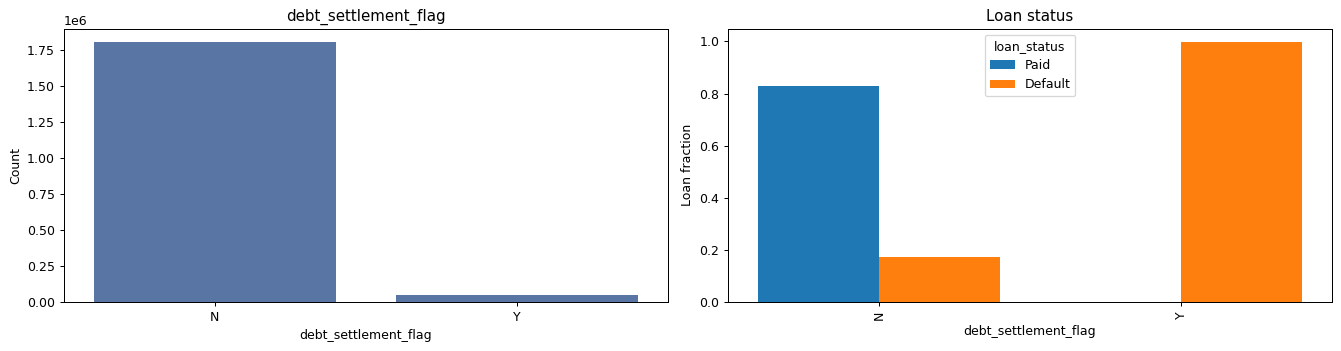

In [53]:
#Check the debt_settlement column.
print('Number of Debt Settlement:\n',df.debt_settlement_flag.value_counts())
plot_feature('debt_settlement_flag', False )

In [54]:
#Adding some unrequired features to the removeable_features.
removeable_features.extend(['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd','num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

In [55]:
#Checking the removeable_features length.
len(set(removeable_features))

49

In [56]:
#Drop the removeable features from the dataset.
df_new = df.drop(list(set(removeable_features)), axis = 1)

In [57]:
#Check the shape of data
df_new.shape

(1860764, 59)

In [58]:
df_dtypes = pd.merge(df_new.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_new.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
9,issue_year,0,int32
11,pub_rec_bankruptcies,0,int32
18,earliest_cr_year,0,int32
21,term,0,int32
26,emp_length,0,int32
0,loan_amnt,0,float64
1,fico_range_high,0,float64
2,open_acc,0,float64
3,pub_rec,0,float64
4,revol_bal,0,float64


In [59]:
#Remove some additional features.
additional_removeable_features =[]
additional_removeable_features.extend(['acc_open_past_24mths','max_bal_bc','inq_fi','open_rv_24m','total_rev_hi_lim','avg_cur_bal','bc_open_to_buy','bc_util','max_bal_bc','inq_fi','open_rv_24m','open_rv_12m','total_bal_il','open_il_24m','open_il_12m','open_act_il','open_acc_6m','inq_last_12m','total_cu_tl','all_util','mths_since_rcnt_il'])

In [60]:
#Checking the additional features length.
len(set(additional_removeable_features))

18

In [61]:
#Drop the additional_removeable_features
df_new = df_new.drop(list(set(additional_removeable_features)), axis = 1)

In [62]:
#Check the shape after removing the additional_removeable_features
df_new.shape

(1860764, 41)

In [63]:
#Create some features for the purpose of analysis.
df_new['earliest_cr_line']=  pd.to_datetime(df_new['earliest_cr_line'], infer_datetime_format=True)
df_new['issue_d']=  pd.to_datetime(df_new['issue_d'], infer_datetime_format=True)
df_new['credit_hist']= df_new['issue_d'] - df_new['earliest_cr_line']
df_new.credit_hist = (df_new.credit_hist/np.timedelta64(1,'D')).astype(int)

In [64]:
#Checking the missing value and their types.
df_dtypes = pd.merge(df_new.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_new.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
1,earliest_cr_year,0,int32
11,pub_rec_bankruptcies,0,int32
15,issue_year,0,int32
19,credit_hist,0,int32
25,emp_length,0,int32
26,term,0,int32
0,loan_amnt,0,float64
2,open_acc,0,float64
3,pub_rec,0,float64
4,revol_bal,0,float64


In [65]:
#Filling the mort_acc with zero where missing. 
df_new['mort_acc'] = np.where(df_new['mort_acc'].isnull(), 0,df_new['mort_acc'])

In [66]:
#Drop the missing rows from th ecolumns.
df_new.dropna(inplace=True)

In [67]:
# Craete some dictionery to change the categorical value into int.
grade_num = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
sub_grade_to_num={'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,'E1':20,'E2':21,'E3':22,'E4':23,'E5':24,'F1':25,'F2':26,'F3':27,'F4':28,'F5':29,'G1':30,'G2':31,'G3':32,'G4':33,'G5':34}
home_ownership_to_num = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
verification_status_num ={'Verified':0,'Not Verified':1}
purpose_to_num = {'car':0,'credit_card':1,'debt_consolidation':2,'educational':3,'home_improvement':4,'house':5,'major_purchase':6,'medical':7,'moving':8,'other':9,'renewable_energy':10,'small_business':11,'vacation':12,'wedding':13}
initial_list_status_to_num = {'f':0,'w':1}
application_type_to_num={'Individual':0,'Joint App':1}
hardship_flag_to_num = {'N':0,'Y':1}
debt_settlement_flag_to_num = {'N':0,'Y':1}
issue_month_to_num = {'Jan':0,'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}
loan_status_to_num = {'Paid':0,'Default':1}
addr_state_to_num = {'AK':0,'AL':1,'AR':2,'AZ':3,'CA':4,'CO':5,'CT':6,'DC':7,'DE':8,'FL':9,'GA':10,'HI':11,'IA':12,'ID':13,'IL':14,'IN':15,'KS':16,'KY':17,'LA':18,'MA':19,'MD':20,'ME':21,'MI':22,'MN':23,'MO':24,'MS':25,'MT':26,'NC':27,'ND':28,'NE':29,'NH':30,'NJ':31,'NM':32,'NV':33,'NY':34,'OH':35,'OK':36,'OR':37,'PA':38,'RI':39,'SC':40,'SD':41,'TN':42,'TX':43,'UT':44,'VA':45,'VT':46,'WA':47,'WI':48,'WV':49,'WY':50}


In [68]:
#Replce the categorical columns with int value.
df_new.replace({'grade':grade_num,'sub_grade': sub_grade_to_num, 'home_ownership':home_ownership_to_num,'verification_status':verification_status_num,'purpose':purpose_to_num,'initial_list_status':initial_list_status_to_num,'application_type':application_type_to_num,'hardship_flag':hardship_flag_to_num,'debt_settlement_flag':debt_settlement_flag_to_num,'issue_month':issue_month_to_num,'loan_status':loan_status_to_num,'addr_state':addr_state_to_num}, inplace=True)

In [69]:
#Drop some unnecessary features.
df_new = df_new.drop(['Date','issue_d','earliest_cr_line'], axis = 1)

In [70]:
#Check is there any null exist 
df_new.isnull().values.any()

False

In [71]:
df_new.isnull().sum(axis = 0).sort_values().to_frame("Missing_Value")

,Missing_Value
loan_amnt,0
revol_bal,0
revol_util,0
total_acc,0
initial_list_status,0
out_prncp,0
out_prncp_inv,0
application_type,0
pub_rec,0
chargeoff_within_12_mths,0


In [72]:
#Deal with infinite value.
df_new = df_new[np.isfinite(df_new).all(1)]

In [73]:
#Check the shape.
df_new.shape

(1848827, 39)

In [74]:
#Create a additional features named Loan_to_annual_inc_ratio
df_new['Loan_to_annual_inc_ratio'] = df_new['loan_amnt'] / df_new['annual_inc']
df_new = df_new[np.isfinite(df_new).all(1)]

**Feature Correlation**

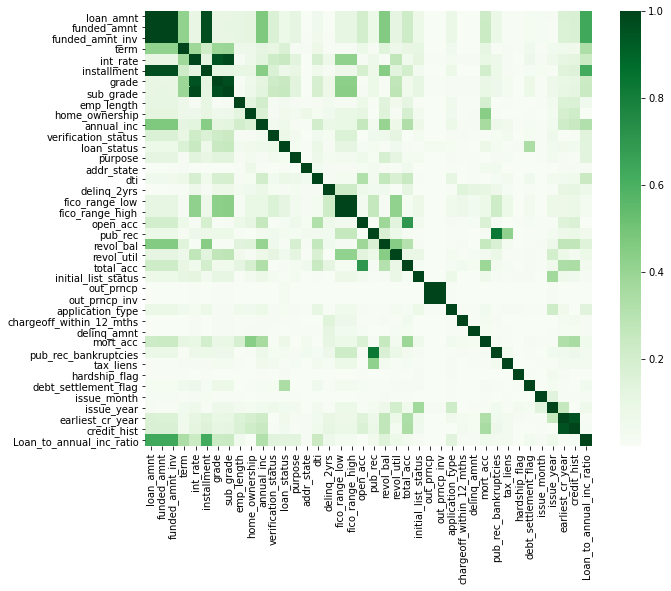

In [75]:
#Checking the eature Correlation 
corr = df_new.corr(method = 'spearman')
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='Greens' )
plt.show()

**Find highly correlated features of dependent variables.**

In [76]:
#Create a table for highly correlated features of dependent variables over 40%.
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr.correlation > 0.4]

,level_0,level_1,correlation
737,fico_range_high,fico_range_low,1.000000
1065,out_prncp_inv,out_prncp,1.000000
40,funded_amnt,loan_amnt,0.999743
81,funded_amnt_inv,funded_amnt,0.998992
80,funded_amnt_inv,loan_amnt,0.998658
284,sub_grade,int_rate,0.983921
286,sub_grade,grade,0.971630
201,installment,funded_amnt,0.968936
200,installment,loan_amnt,0.968516
202,installment,funded_amnt_inv,0.967732


In [77]:
#Remove the highly correlated features.
high_correlated_feat = ['revol_bal','out_prncp','funded_amnt','funded_amnt_inv', 'grade', 'installment','int_rate','earliest_cr_year','pub_rec','open_acc','tax_liens','fico_range_low','out_prncp_inv']
df_new.drop(high_correlated_feat, axis=1, inplace=True)

In [78]:
#Check the shaee.
df_new.shape

(1848821, 27)

**Correlation with target variable**


In [79]:
#Create a table for checking the correlation with target variable.
corr_with_target = df_new.corrwith(df_new.loan_status).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(30)
unique_values = df_new.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')
corr_with_unique.sort_values("correlation_with_target",ascending=False)

,index,correlation_with_target,unique_values
0,loan_status,1.000000,2
1,debt_settlement_flag,0.342700,2
2,sub_grade,0.257733,35
3,term,0.168728,2
26,fico_range_high,0.121047,39
25,verification_status,0.075441,2
4,loan_amnt,0.071820,1567
24,mort_acc,0.069521,42
5,dti,0.064262,9289
6,revol_util,0.049615,1406


In [80]:
#Remove the low correlated features.
Unnecessary_Featres = ['addr_state','Loan_to_annual_inc_ratio','issue_year','total_acc','purpose','delinq_2yrs','hardship_flag','initial_list_status','issue_month','chargeoff_within_12_mths','delinq_amnt']
df_new.drop(Unnecessary_Featres, axis=1, inplace=True)

In [81]:
#Check the shape.
df_new.shape

(1848821, 16)

In [82]:
# Create a function for finanl dataset visualization.
def final_feature_plot(df, col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(y=col_name, x='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

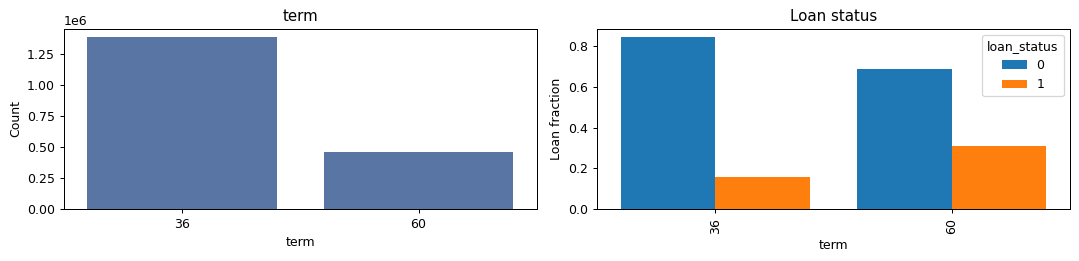

In [83]:
#Plot the Term
final_feature_plot(df_new,'term',False)

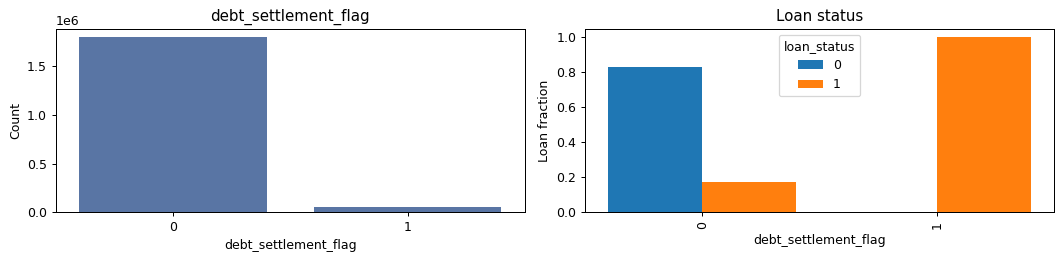

In [84]:
final_feature_plot(df_new,'debt_settlement_flag',False)

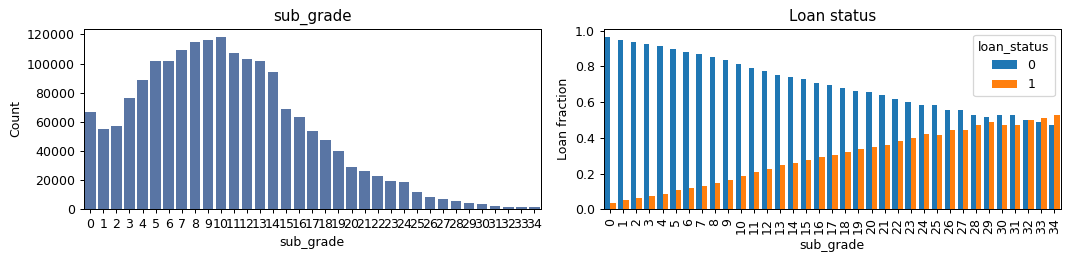

In [85]:
#Plot Sub-grade.
final_feature_plot(df_new,'sub_grade',False)

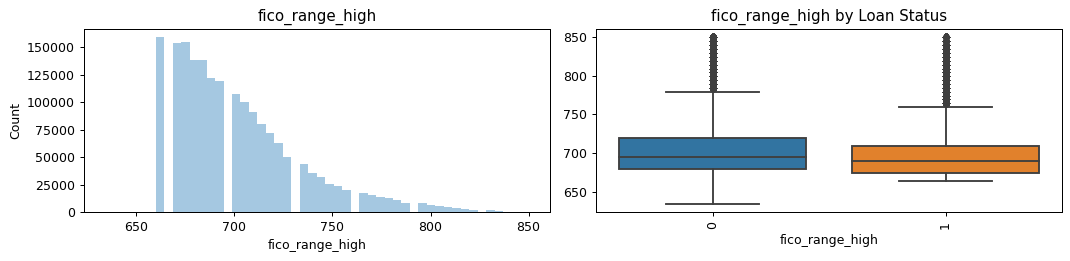

In [86]:
#Plot fico_range_high
final_feature_plot(df_new,'fico_range_high',True)

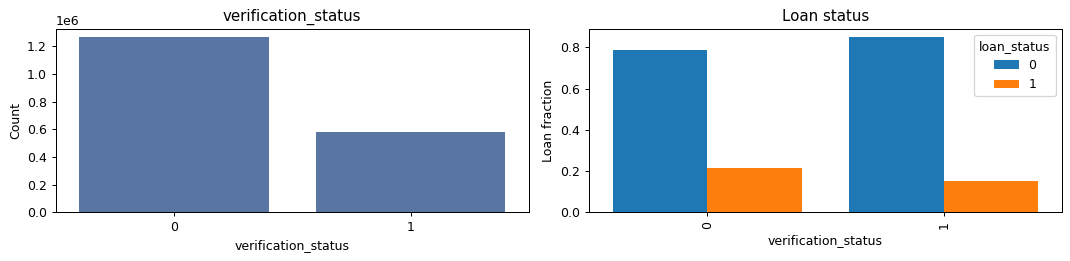

In [87]:
#Plot verification_status
final_feature_plot(df_new,'verification_status',False)

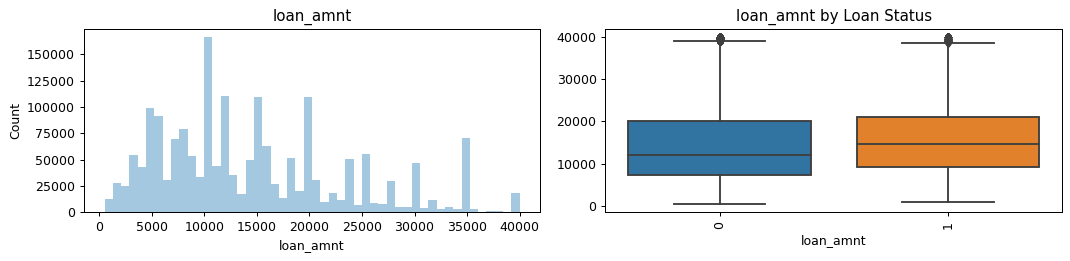

In [88]:
#Plot loan_amnt
final_feature_plot(df_new,'loan_amnt',True)

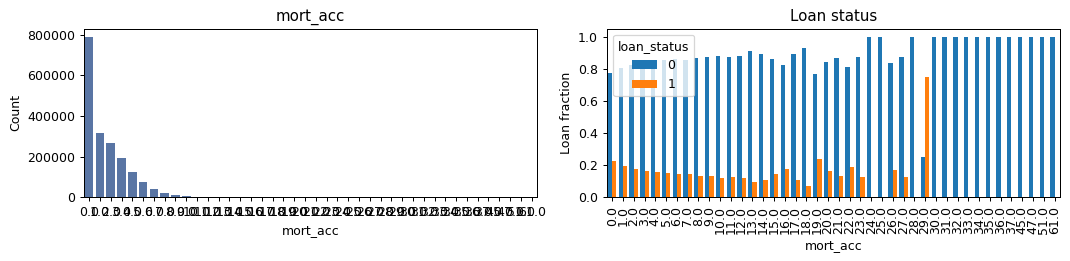

In [89]:
#Plot mort_acc
final_feature_plot(df_new,'mort_acc',False)

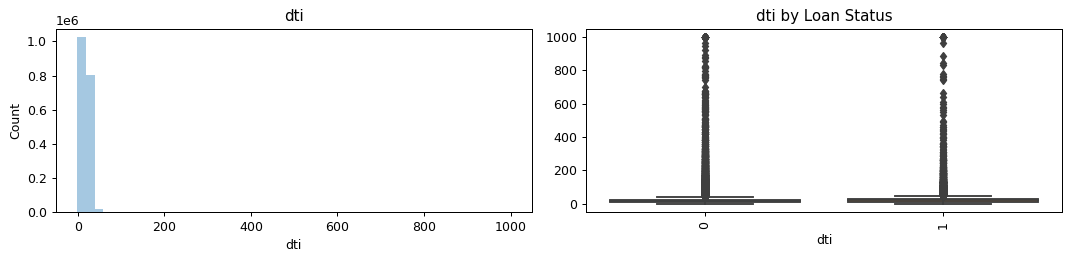

In [90]:
#Plot dti
final_feature_plot(df_new,'dti',True)

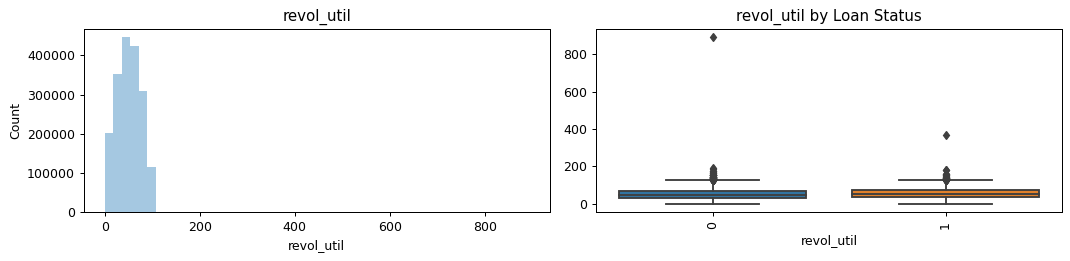

In [91]:
#Plot revol_util
final_feature_plot(df_new,'revol_util',True)

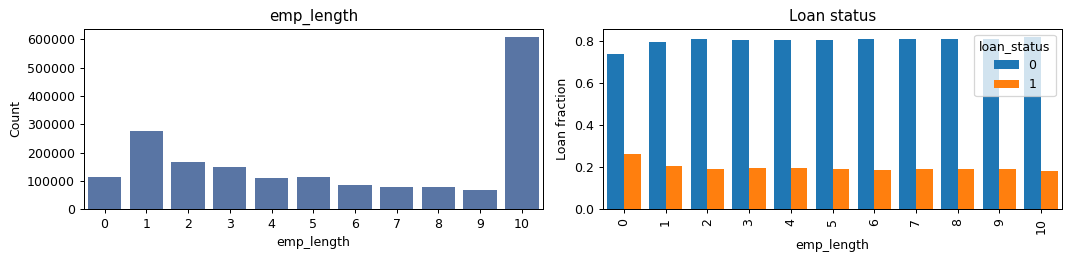

In [92]:
#Plot emp_length
final_feature_plot(df_new,'emp_length',False)

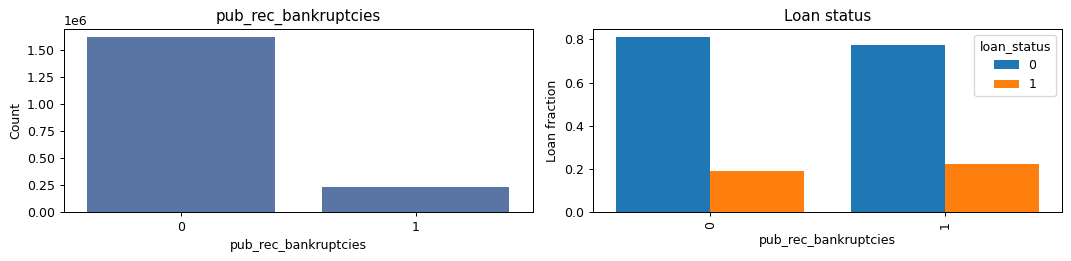

In [93]:
#Plot pub_rec_bankruptcies
final_feature_plot(df_new,'pub_rec_bankruptcies',False)

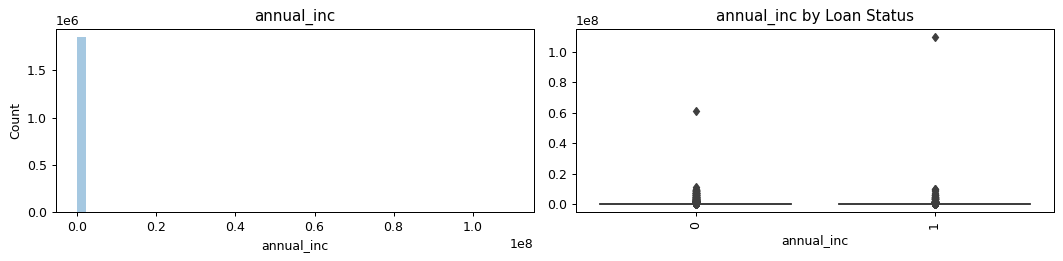

In [94]:
#Plot annual_inc
final_feature_plot(df_new,'annual_inc',True)

In [95]:
df_new.to_csv(r'C:\Users\mehed\Google Drive\Colab Notebooks\Lending Club Data\df_final.csv',index=False)